<h3 style="font-family: newtimeroman; font-size: 250%; color: white; border-radius: 80px 20px; padding: 25px; text-align: center;">
  <b>Convolutional Neural Network (CNN) for Binary Classification of Brain Tumors</b>
 </h3>
    <p style='font-size : 150%; font-family: timesnewroman'>This project implements a deep Convolutional Neural Network (CNN) using TensorFlow and Keras for binary classification tasks. The network consists of multiple convolutional layers, max pooling, and dropout layers to prevent overfitting. The final output layer uses a sigmoid activation function, providing a probability score for the binary classification.</p>


<h3 style="font-family: newtimeroman; font-size: 200%; color: white; border-radius: 80px 20px; padding: 25px; text-align: left;">
  <b>1. Reading and Labeling the data:</b>
</h3>

In [1]:
import os
import cv2
import pandas as pd

dir = '/kaggle/input/brain-cancer-detection-mri-images/Dataset'

dataset = []

for label in os.listdir(dir):
    class_dir = os.path.join(dir,label)
    for image in os.listdir(class_dir):
        if label.startswith('t'):
            label_to_add = 1 #1 for tumor
        if label.startswith('h'):
            label_to_add = 0 # 0 for healthy
        image_path = os.path.join(class_dir,image)
        img_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        resized_img_array = cv2.resize(img_array, (100,100))
        dataset.append([resized_img_array,label_to_add])
len(dataset)

800

<h3 style="font-family: newtimeroman; font-size: 200%; color: white; border-radius: 80px 20px; padding: 25px; text-align: left;">
  <b>2. Plotting and visualizing the images:</b>
</h3>

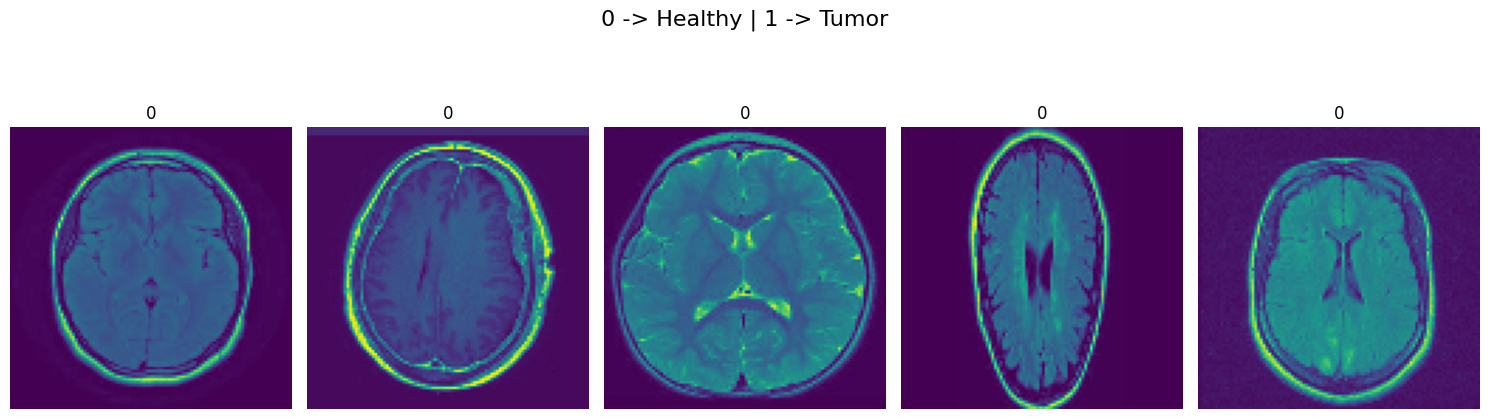

In [2]:
import random
import matplotlib.pyplot as plt

random.shuffle(dataset)

fig, axes = plt.subplots(1, 5, figsize=(15, 5))

# Iterate through the dataset and plot each image
for i, (image, label) in enumerate(dataset[:5]):
    axes[i].imshow(image)
    axes[i].set_title(label)
    axes[i].axis('off')  # Hide axes to make it cleaner

# Display the plots
plt.suptitle("0 -> Healthy | 1 -> Tumor", fontsize=16)
plt.tight_layout()
# plt.subplots_adjust(top=0.85)
plt.show()

<h3 style="font-family: newtimeroman; font-size: 200%; color: white; border-radius: 80px 20px; padding: 25px; text-align: left;">
  <b>3. Preprocessing and splitting the data into train and test sets</b>
</h3>

In [3]:
import numpy as np

split_size = int(0.2 * len(dataset))

train_data = dataset[:-split_size]
test_data = dataset[-split_size:]

print("Train data -->",len(train_data), 'Test data -->' ,len(test_data))

def extract_features_from_labels(data):\
    
    X_ = []
    Y_ = []
    
    for x_, y_ in data:
        X_.append(x_)
        Y_.append(y_)
        
    X_ = np.array(X_)
    X_ = X_ / 255.0
    X_ = X_.reshape(-1, 100, 100, 1)
    Y_ = np.array(Y_)
    
    return X_,Y_
X_train, y_train = extract_features_from_labels(train_data)
X_test, y_test = extract_features_from_labels(test_data)

Train data --> 640 Test data --> 160


<h3 style="font-family: newtimeroman; font-size: 200%; color: white; border-radius: 80px 20px; padding: 25px; text-align: left;">
  <b>4. Defining Model Architecture Using Keras - Multilayered Convolutional Nueral Network (CNN):</b>
 </h3>
 <h2 style='font-family : timesnewroman; font-size : 150%'>Model Architecture:</h2>
<ul style='font-family : timesnewroman; font-size : 150%'>
  <li><strong>Convolutional Layers:</strong> Five convolutional layers with increasing filter sizes (64, 128, 256, 364, 684) for hierarchical feature extraction.</li>
  <li><strong>Activation Function:</strong> ReLU (Rectified Linear Unit) activation is used for all hidden layers, providing non-linearity to the network.</li>
  <li><strong>MaxPooling Layers:</strong> After each convolutional layer, max pooling reduces the spatial dimensions, helping the model generalize.</li>
  <li><strong>Dropout Layers:</strong> Dropout is applied after the second, third, and fourth convolutional layers to reduce overfitting.</li>
  <li><strong>Fully Connected Layers:</strong> Two dense layers are used before the final output layer.</li>
  <li><strong>Output Layer:</strong> A single node with sigmoid activation is used to output probabilities for binary classification.</li>
</ul>

<h2 style='font-family : timesnewroman; font-size : 150%'>Training:</h2>
<ul style='font-family : timesnewroman; font-size : 150%'>
  <li>The model is compiled with the <strong>RMSprop</strong> optimizer and uses <strong>binary cross-entropy</strong> as the loss function, making it suitable for binary classification tasks.</li>
  <li>The model is trained for 50 epochs with a batch size of 4, and validation is performed on 10% of the training data.</li>
</ul>
</div>

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Dropout, Flatten

Model = Sequential()

#1st layer:-
Model.add(Conv2D(64, (2,2), padding = 'same', input_shape = X_train.shape[1:]))
Model.add(Activation('relu'))
Model.add(MaxPooling2D(pool_size = (2,2)))


#2nd layer:-
Model.add(Conv2D(128, (2,2)))
Model.add(Activation('relu'))
Model.add(MaxPooling2D(pool_size = (2,2)))
Model.add(Dropout(0.2))


#3rd layer:-
Model.add(Conv2D(256, (2,2)))
Model.add(Activation('relu'))
Model.add(MaxPooling2D(pool_size = (2,2)))
Model.add(Dropout(0.2))

Model.add(Conv2D(364, (2,2)))
Model.add(Activation('relu'))
Model.add(MaxPooling2D(pool_size = (2,2)))
Model.add(Dropout(0.2))


#4th layer:-
Model.add(Conv2D(684, (2,2)))
Model.add(Activation('relu'))
Model.add(MaxPooling2D(pool_size = (2,2)))
Model.add(Dropout(0.2))



#Final Output layer:-
Model.add(Flatten())

Model.add(Dense(128))
Model.add(Activation('relu'))

Model.add(Dense(64))
Model.add(Activation('relu'))

Model.add(Dense(1, activation = 'sigmoid'))

Model.summary()

Model.compile(optimizer = RMSprop(), loss = 'binary_crossentropy', metrics = ['accuracy'])

History = Model.fit(X_train, y_train, epochs = 50, batch_size = 4, validation_split = 0.1)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 100, 100, 64)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 49, 49, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 49, 49, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 23, 23, 256)    │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 23, 23, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 364)    │       373,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10, 10, 364)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 364)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 5, 364)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 684)      │       996,588 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 4, 4, 684)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 684)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2, 2, 684)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2736)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       350,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            6

 Total params: 1,892,889 (7.22 MB)

 Trainable params: 1,892,889 (7.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


I0000 00:00:1726642541.043381      67 service.cc:145] XLA service 0x7bfb64002ef0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726642541.043440      67 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 33/144 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4809 - loss: 0.7772

I0000 00:00:1726642548.250712      67 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


144/144 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4827 - loss: 0.7259 - val_accuracy: 0.4375 - val_loss: 0.6969
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5935 - loss: 0.6749 - val_accuracy: 0.7500 - val_loss: 0.5696
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8268 - loss: 0.4477 - val_accuracy: 0.7969 - val_loss: 0.6412
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8547 - loss: 0.3791 - val_accuracy: 0.7969 - val_loss: 0.4417
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8665 - loss: 0.3338 - val_accuracy: 0.7656 - val_loss: 0.4023
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9007 - loss: 0.2500 - val_accuracy: 0.7500 - val_loss: 0.6902
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8764 - loss: 0.3176 - val_accuracy: 0.8281 - val_loss: 0.3647
Epoch 8/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9103 - loss: 0.2362 - val_accuracy: 0.8594 - val

<h3 style="font-family: newtimeroman; font-size: 200%; color: white; border-radius: 80px 20px; padding: 25px; text-align: left;">
  <b>5. Plotting Training vs Validation (Accuracy & Loss) </b>
</h3>

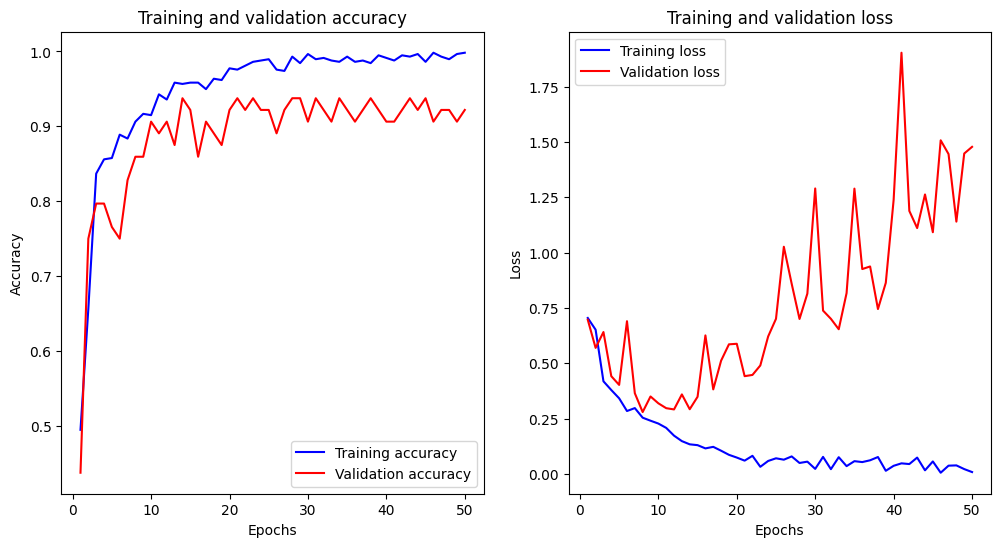

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  


96.25

In [5]:
import matplotlib.pyplot as plt
acc = History.history['accuracy']
val_acc = History.history['val_accuracy']

loss = History.history['loss']
val_loss = History.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

y_pred = Model.predict(X_test)

threshold = 0.5
y_pred_label = []
tumor_count = 0
healthy_count = 0

for pred in y_pred:
    if(pred < 0.5):
        y_pred_label.append(0)
        healthy_count += 0
    else:
        y_pred_label.append(1)
        tumor_count += 1


true_count = 0
for true, pred in zip(y_test, y_pred_label):
    if true == pred:
        true_count = true_count + 1
accuracy = (true_count / len(y_test)) * 100
accuracy

<h3 style="font-family: newtimeroman; font-size: 200%; color: white; border-radius: 80px 20px; padding: 25px; text-align: center;">
  <b>6. Conclusion: </b>
    <h4 style='font-family : timesnewroman; font-size : 150%; text-align : center'>The CNN model achieved an accuracy of <strong>93.75%</strong> on the binary classification task, demonstrating its effectiveness in feature extraction and classification. The combination of multiple convolutional layers, ReLU activation, dropout for regularization, and the RMSprop optimizer helped the model generalize well on the validation set. This high accuracy suggests the model is well-suited for the task, though further tuning and testing may improve performance even further.</h4>
</h3>